In [2]:
import pandas as pd
import numpy as np

In [3]:
result_of_all={}
result_of_all["KNN-Agglomerative"]=pd.read_csv(r"D:\Github\Data_Mining_113-2\Data_Mining_Final\clustering\result\KNN-Agglomerative_clustering_result.csv")
result_of_all["KNN-DBSCAN"]=pd.read_csv(r"D:\Github\Data_Mining_113-2\Data_Mining_Final\clustering\result\KNN-DBSCAN_clustering_result.csv")
result_of_all["KNN-Spectral"]=pd.read_csv(r"D:\Github\Data_Mining_113-2\Data_Mining_Final\clustering\result\KNN-Spectral_clustering_result.csv")
result_of_all["RF-Agglomerative"]=pd.read_csv(r"D:\Github\Data_Mining_113-2\Data_Mining_Final\clustering\result\RF-Agglomerative_clustering_result.csv")
result_of_all["RF-DBSCAN"]=pd.read_csv(r"D:\Github\Data_Mining_113-2\Data_Mining_Final\clustering\result\RF-DBSCAN_clustering_result.csv")
result_of_all["RF-Spectral"]=pd.read_csv(r"D:\Github\Data_Mining_113-2\Data_Mining_Final\clustering\result\RF-Spectral_clustering_result.csv")
KNN_df= pd.read_csv(r"D:\Github\Data_Mining_113-2\Data_Mining_Final\classification\result\KNN_known.csv")
RF_df= pd.read_csv(r"D:\Github\Data_Mining_113-2\Data_Mining_Final\classification\result\RF_known.csv")

for key in result_of_all:
    if key[:3]=="KNN":
        result_of_all[key] = pd.concat([pd.DataFrame(result_of_all[key].values), pd.DataFrame(KNN_df.values)], ignore_index=True)
    else:
        result_of_all[key] = pd.concat([pd.DataFrame(result_of_all[key].values), pd.DataFrame(RF_df.values)], ignore_index=True)
    result_of_all[key].rename(columns={0: 'ID', 1: 'Class'}, inplace=True)
    result_of_all[key]['Class'] = result_of_all[key]['Class'].astype(str)
    print(key,"finish concat")
    

KNN-Agglomerative finish concat
KNN-DBSCAN finish concat
KNN-Spectral finish concat
RF-Agglomerative finish concat
RF-DBSCAN finish concat
RF-Spectral finish concat


In [15]:
test_label = pd.read_csv(r"D:\Github\Data_Mining_113-2\Data_Mining_Final\dataset\test_label.csv")
"""
known: KIRC,BRCA,LUAD
unknown: COAD, PRAD
"""
np.unique(test_label["Class"])
Class = {'KIRC':0, 'BRCA':0, 'LUAD':0, 'COAD':0, 'PRAD':0}
for key in Class:
    Class[key]=sum(test_label["Class"]==key)
test_label.rename(columns={'id': 'ID','Class':'Ans'}, inplace=True)
print(Class)

{'KIRC': 29, 'BRCA': 56, 'LUAD': 33, 'COAD': 78, 'PRAD': 136}


In [5]:
COAD=[];PRAD=[];COAD_replacement={};PRAD_replacement={}
for sample in test_label[test_label["Ans"]=="COAD"]["ID"]:
    COAD.append(sample)
for sample in test_label[test_label["Ans"]=="PRAD"]["ID"]:
    PRAD.append(sample)
print(COAD)
print(PRAD)

['sample_26', 'sample_47', 'sample_54', 'sample_57', 'sample_65', 'sample_79', 'sample_96', 'sample_107', 'sample_130', 'sample_132', 'sample_139', 'sample_145', 'sample_166', 'sample_180', 'sample_232', 'sample_237', 'sample_249', 'sample_252', 'sample_260', 'sample_261', 'sample_263', 'sample_264', 'sample_272', 'sample_302', 'sample_308', 'sample_312', 'sample_321', 'sample_339', 'sample_353', 'sample_354', 'sample_361', 'sample_363', 'sample_371', 'sample_379', 'sample_382', 'sample_383', 'sample_387', 'sample_400', 'sample_414', 'sample_431', 'sample_444', 'sample_464', 'sample_466', 'sample_473', 'sample_490', 'sample_493', 'sample_501', 'sample_503', 'sample_510', 'sample_530', 'sample_531', 'sample_539', 'sample_542', 'sample_553', 'sample_561', 'sample_570', 'sample_585', 'sample_588', 'sample_590', 'sample_597', 'sample_607', 'sample_613', 'sample_618', 'sample_634', 'sample_650', 'sample_652', 'sample_662', 'sample_665', 'sample_670', 'sample_692', 'sample_693', 'sample_713'

In [6]:
"""PRAD"""
for key in result_of_all:
    coad_result=[]
    for id in PRAD:
        coad_result.append(result_of_all[key][result_of_all[key]["ID"] == id]["Class"])
    class_name, class_count=np.unique(coad_result, return_counts=True)
    dic=dict(zip(class_name, class_count))
    PRAD_replacement[key]=max(dic, key=dic.get)

In [7]:
"""COAD"""
for key in result_of_all:
    coad_result=[]
    for id in COAD:
        coad_result.append(result_of_all[key][result_of_all[key]["ID"] == id]["Class"])
    class_name, class_count=np.unique(coad_result, return_counts=True)
    dic=dict(zip(class_name, class_count))
    COAD_replacement[key]=max(dic, key=dic.get)


In [8]:
for key in result_of_all:
    result_of_all[key]["Class"]=result_of_all[key]["Class"].replace({COAD_replacement[key]: 'COAD', PRAD_replacement[key]: 'PRAD'})
    result_of_all[key]=pd.merge(result_of_all[key], test_label, on='ID')
    print(result_of_all[key])

             ID Class   Ans
0      sample_0  PRAD  PRAD
1      sample_2  PRAD  PRAD
2      sample_3  PRAD  PRAD
3      sample_5  PRAD  PRAD
4      sample_6  PRAD  KIRC
..          ...   ...   ...
327  sample_510  LUAD  COAD
328  sample_620  BRCA  PRAD
329  sample_717  BRCA  PRAD
330  sample_741  BRCA  PRAD
331  sample_755  LUAD  COAD

[332 rows x 3 columns]
             ID       Class   Ans
0    sample_189  unknown -1  LUAD
1    sample_320  unknown -1  LUAD
2    sample_288  unknown -1  KIRC
3      sample_6  unknown -1  KIRC
4     sample_13  unknown -1  BRCA
..          ...         ...   ...
327  sample_510        LUAD  COAD
328  sample_620        BRCA  PRAD
329  sample_717        BRCA  PRAD
330  sample_741        BRCA  PRAD
331  sample_755        LUAD  COAD

[332 rows x 3 columns]
             ID Class   Ans
0    sample_189  COAD  LUAD
1    sample_320  COAD  LUAD
2    sample_288  PRAD  KIRC
3      sample_6  PRAD  KIRC
4     sample_13  PRAD  BRCA
..          ...   ...   ...
327  sample_

In [9]:
import matplotlib.pyplot as plt

In [10]:
def add_labels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha='center',c='white')  # Aligning text at center

In [24]:
p={}
def clustering_evaluation(key,y_true, y_pred):
    df = pd.DataFrame({'true': y_true, 'pred': y_pred})

    # 混淆矩陣
    confusion = pd.crosstab(df['true'], df['pred'])

    # Purity 計算：每個 predicted cluster 中最多的正確 label 數量加總 / 全部樣本
    purity = confusion.max(axis=0).sum() / confusion.values.sum()
    p[key]=purity*100
    print("Confusion Matrix:")
    print(confusion)
    print("\nPurity Score:", round(purity, 4))
for key in result_of_all:
    print("[",key,"]")
    clustering_evaluation(key,result_of_all[key]["Ans"], result_of_all[key]["Class"])
    print()


[ KNN-Agglomerative ]
Confusion Matrix:
pred  BRCA  COAD  KIRC  LUAD  PRAD
true                              
BRCA    53     3     0     0     0
COAD     0    76     0     2     0
KIRC     0     1    26     0     2
LUAD     0     8     0    25     0
PRAD     4     0     0     0   132

Purity Score: 0.9398

[ KNN-DBSCAN ]
Confusion Matrix:
pred  BRCA  COAD  KIRC  LUAD  PRAD  unknown -1
true                                          
BRCA    53     0     0     0     0           3
COAD     0    75     0     2     0           1
KIRC     0     0    26     0     0           3
LUAD     0     0     0    25     0           8
PRAD     4     0     0     0   130           2

Purity Score: 0.9548

[ KNN-Spectral ]
Confusion Matrix:
pred  BRCA  COAD  KIRC  LUAD  PRAD
true                              
BRCA    53     2     0     0     1
COAD     0    76     0     2     0
KIRC     0     0    26     0     3
LUAD     0     7     0    25     1
PRAD     4     0     0     0   132

Purity Score: 0.9398

[ RF

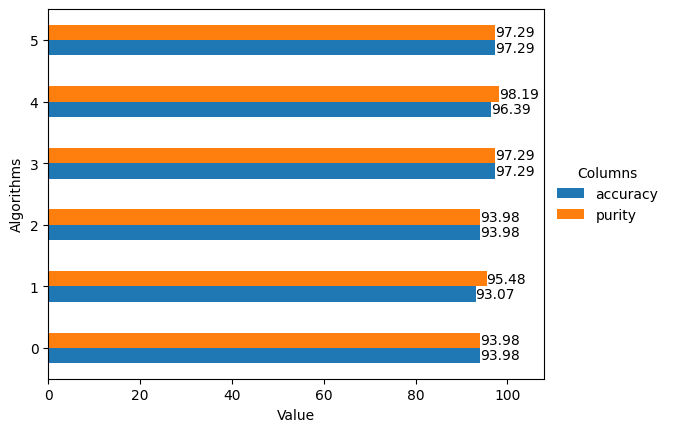

In [ ]:
accuracy={}
for key in result_of_all:
    accuracy[key]=round(sum(result_of_all[key]["Class"]==result_of_all[key]["Ans"])/len(test_label)*100, 2)
df=pd.DataFrame({
    "Algorithms":list(accuracy.keys()),
    "accuracy":list(accuracy.values()),
    "purity":list(p.values()),
})
ax = df.plot(kind='barh', ylabel='Algorithms')
ax.set(xlabel='Value(in percentage)')
for c in ax.containers:
    # set the bar label
    ax.bar_label(c, fmt='%.2f', label_type='edge')
    
ax.margins(x=0.1)

# move the legend out of the plot
ax.legend(title='Columns', bbox_to_anchor=(1, 0.5), loc='center left', frameon=False)
